# Lessons 8 and 9: K-means Clustering and Feature Scaling

### Importing libraries

In [6]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cluster import KMeans

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

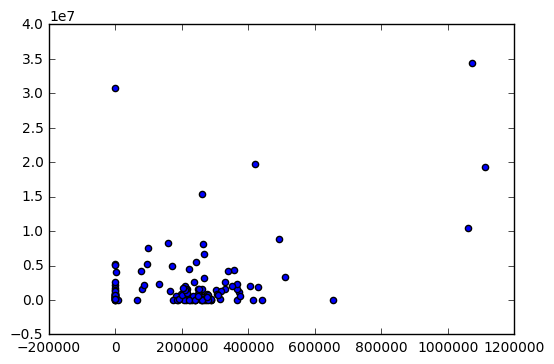

In [7]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [13]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

cluster = KMeans(n_clusters = 2)
cluster.fit(finance_features)
pred = list(cluster.predict(finance_features))

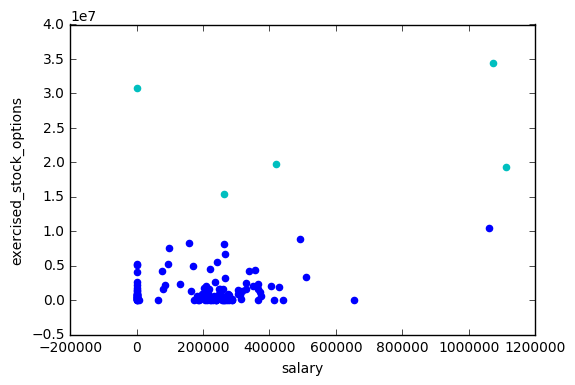

In [14]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

## Clustering with 3 Features

In [18]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

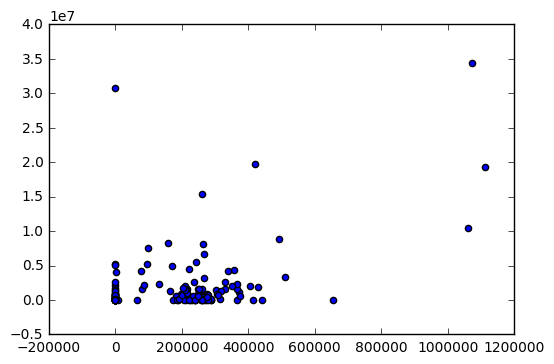

In [20]:
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [21]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

cluster = KMeans(n_clusters = 2)
cluster.fit(finance_features)
pred = list(cluster.predict(finance_features))

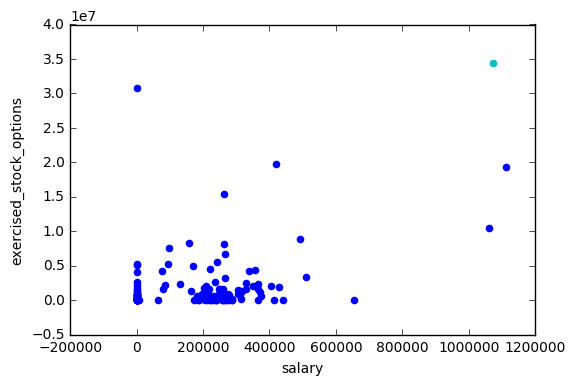

In [24]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_3features.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

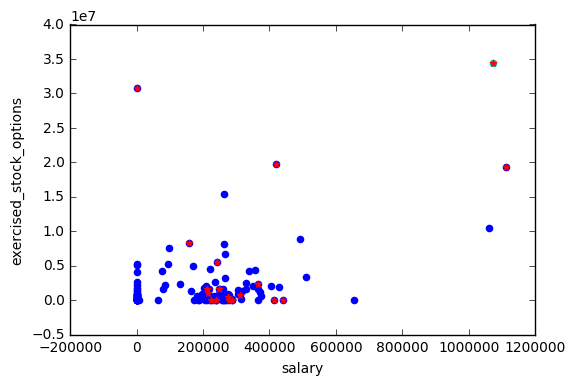

In [25]:
try:
    Draw(pred, finance_features, poi, mark_poi=True, name="clusters_3features_with_pois.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

### And if we have three clusters?

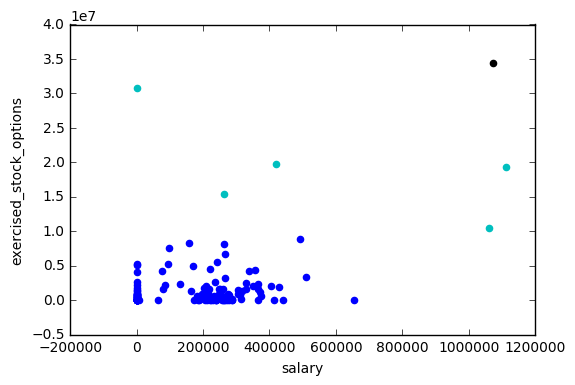

In [27]:
cluster = KMeans(n_clusters = 3)
cluster.fit(finance_features)
pred = list(cluster.predict(finance_features))

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_3features_3clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

### Preview: Feature scaling

What are the min and max values of exercised_stock_options? (Careful: finance_features has been processed and NaNs were replaced by 0. Look at data_dict.)

In [80]:
exercised_stock_options = []
for name in data_dict.keys():
    exercised_stock_options.append(float(data_dict[name]["exercised_stock_options"]))

Ok, I give up. I have no idea, why this gives reasonable results:

In [89]:
list = [0, 1, 2, 3.5, float("NaN")]
print min(list), max(list)

0 3.5


but this does not:

In [109]:
print min(exercised_stock_options), max(exercised_stock_options)

nan nan


So here is a workaround:

In [110]:
minimum = 400000000000.
for entry in exercised_stock_options:
    if entry < minimum:
        minimum = entry
        print minimum

6680544.0
4890344.0
651850.0
493489.0
372205.0
185063.0
81042.0
3285.0


In [111]:
maximum = 0.
for entry in exercised_stock_options:
    if entry > maximum:
        maximum = entry
        print maximum

6680544.0
34348384.0


### And the same for salary:

In [114]:
salary = []
for name in data_dict.keys():
    salary.append(float(data_dict[name]["salary"]))

In [115]:
minimum = 400000000000.
for entry in salary:
    if entry < minimum:
        minimum = entry
        print minimum

365788.0
267102.0
170941.0
130724.0
63744.0
477.0


In [116]:
maximum = 0.
for entry in salary:
    if entry > maximum:
        maximum = entry
        print maximum

365788.0
370448.0
428780.0
510364.0
1072321.0
1111258.0


### Feature scaling exercises

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

check, if data in correct format:

In [129]:
type(finance_features)

list

-> has to be converted into np.array first

In [127]:
for i in range(2): 
    print type(finance_features[0][i])

<type 'numpy.float64'>
<type 'numpy.float64'>


-> this is ok

In [131]:
weights = numpy.array(finance_features)
scaler = MinMaxScaler()
rescaled_weights = scaler.fit_transform(weights)

#### What would be the rescaled value of a "salary" feature that had an original value of 200,000, and an "exercised_stock_options" feature of 1 million?

In [133]:
scaler.transform([[200000., 1000000.]])

array([[ 0.17997621,  0.02911345]])